# Моделирование | «Интерференция»

Моделирование интерференции от N (1<=N<=10) узких высоких щелей c изменяемыми
параметрами (ширина, период). Рассмотреть монохроматический и
квазимонохроматический свет (задается середина и ширина спектра в нанометрах). Вывод распределения интенсивности на выбранном расстоянии от щелей и графика
зависимости интенсивности от координаты.

![](./drawing.png)


Для описания интерференционной картины при прохождении света через N щелей может использоваться следующая формула:

$$ I(x) = I_0(\frac{sin(\beta)}{\beta})^2 * (\frac{sin(Na)}{sin(a)})^2 $$


$$ \beta = \frac{\pi d sin(\theta)}{\lambda} \\ 
a = \frac{\pi asin(\theta)}{\lambda} $$

здесь 

$d$ — ширина щели

$a$ — период решетки 

$\lambda$ — длинна световой волны

$\theta$ — угол отклонения от центрального максимума

$I_0$ — максимальная интенсивность

$N$ — количество щелей

для малых углов

$$ sin(\theta) \approx \theta \approx \frac{x}{L} $$

$x$ — координата на экране

$L$ — расстояние до экрана



In [285]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

%matplotlib inline

# Параметры моделирования
d = 0.1e-3  # ширина щели, метры
a = 0.5e-3  # период, метры
N = 50  # число щелей
L = 1.0  # расстояние до экрана, метры
lambda_0 = 500e-9  # длина волны монохроматического света, метры
delta_lambda = 10e-9  # ширина спектра квазимонохроматического света, метры

# Задание координат на экране
x = np.linspace(-0.01, 0.01, 10000)  # 10 мм по обе стороны от центра

## Монохроматический свет

Монохроматический свет - свет, который состоит из волн одной длины (частоты).
Т.е. для монохроматического света $\lambda = const$ 

Формула интенсивности:

$$ I(x) = I_0(\frac{sin(\beta)}{\beta})^2 \cdot (\frac{sin(Na)}{sin(a)})^2 $$

In [286]:
def monochromatic_intensity(x, d, a, N, L, lambda_0):
    beta = (np.pi * d * x) / (lambda_0 * L)
    alpha = (np.pi * a * x) / (lambda_0 * L)

    # Интенсивность для одиночной решетки
    single_slit = (np.sin(beta) / beta) ** 2

    # Интенсивность для решетки из N щелей
    multiple_slits = (np.sin(N * alpha) / np.sin(alpha)) ** 2

    # Итоговая интенсивность
    intensity = single_slit * multiple_slits
    return intensity

I_mono = monochromatic_intensity(x, d, a, N, L, lambda_0)

I_mono.shape

(10000,)

## Квазихроматический свет

Квазихроматический свет - свет, который имеет небольшой, но конечный спектральный разброс вокруг центральной длины волны.
Тогда $\lambda \in (\lambda_0 - \Delta\lambda; \lambda_0 + \Delta\lambda)$. Здесь $\lambda_0$ - центральная длина волны, $\Delta\lambda$ - ширина спектра.


$$ I_{avarage}(x) = \int_{\lambda_0 - \Delta\lambda}^{\lambda_0 + \Delta\lambda} I(x, \lambda)P(\lambda)d\lambda $$

Здесь $P(\lambda) $ - функция распределения длин волн (например, Гауссово распределение или равномерное распределение)

In [287]:
def quasichromatic_intensity(x, d, a, N, L, lambda_0, delta_lambda):
    # Создание массива длин волн в спектре
    lambdas = np.linspace(lambda_0 - delta_lambda, lambda_0 + delta_lambda, 100)

    # Инициализация массива интенсивностей
    intensities = np.zeros_like(x, dtype=float)

    # Усреднение интенсивностей для всех длин волн в спектре
    for lamb in lambdas:
        intensities += monochromatic_intensity(x, d, a, N, L, lamb)

    # Нормализация интенсивности на количество длин волн
    return intensities / len(lambdas)

I_quasi = quasichromatic_intensity(x, d, a, N, L, lambda_0, delta_lambda)

I_quasi.shape



(10000,)

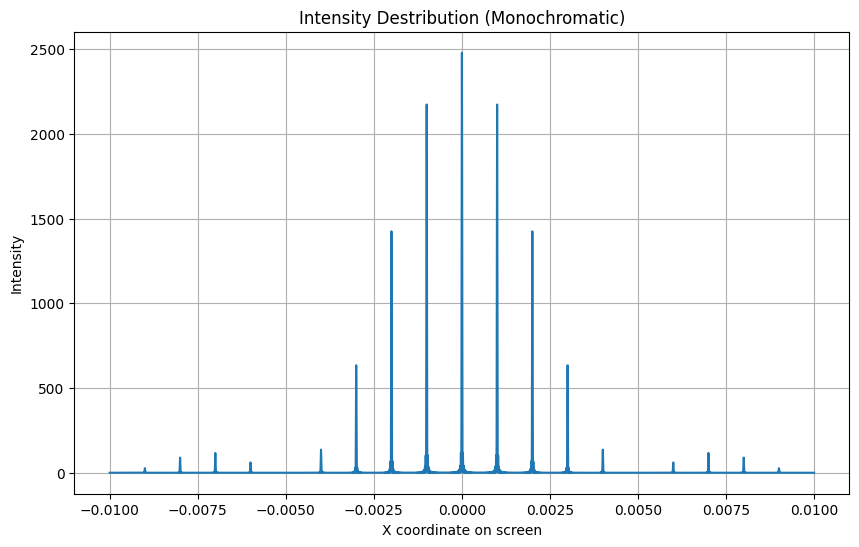

In [288]:
plt.figure(figsize=(10, 6))
plt.plot(x, I_mono)
plt.title('Intensity Destribution (Monochromatic)')
plt.xlabel('X coordinate on screen')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

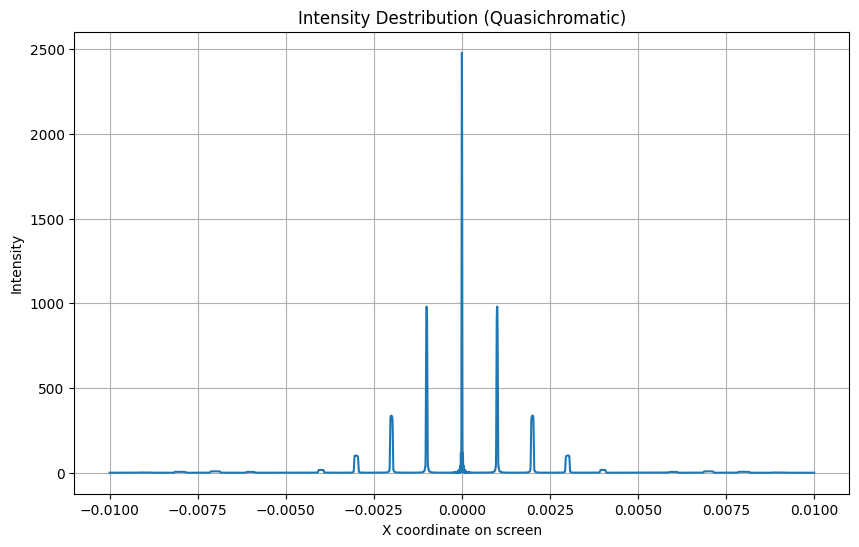

In [289]:
plt.figure(figsize=(10, 6))
plt.plot(x, I_quasi)
plt.title('Intensity Destribution (Quasichromatic)')
plt.xlabel('X coordinate on screen')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


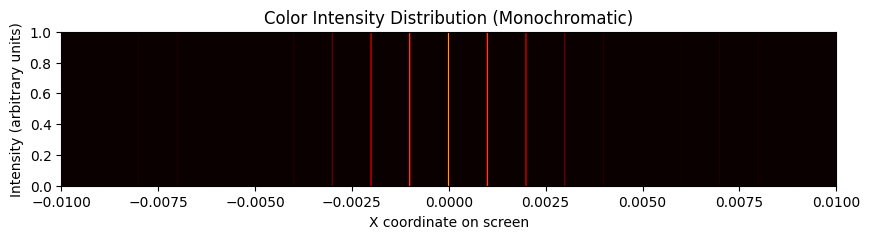

In [290]:
# Построение цветного распределения интенсивности для монохроматического света
plt.figure(figsize=(10, 2))
plt.imshow(np.tile(I_mono, (50, 1)), 
						   cmap='hot',
					     aspect='auto', 
					     extent=[x.min(), x.max(), 0, 1])
plt.title('Color Intensity Distribution (Monochromatic)')
plt.xlabel('X coordinate on screen')
plt.ylabel('Intensity (arbitrary units)')
plt.show()

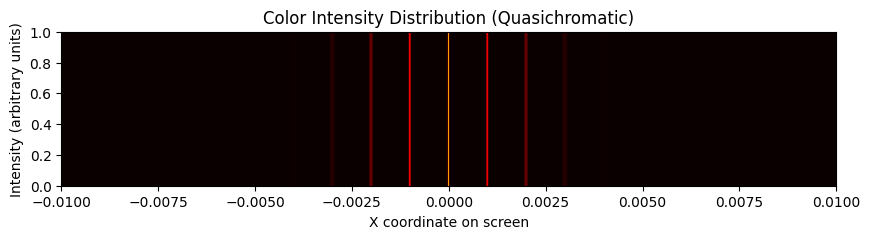

In [291]:
# Построение цветного распределения интенсивности для квазимонохроматического света
plt.figure(figsize=(10, 2))
plt.imshow(np.tile(I_quasi, (50, 1)),
           cmap='hot',
           aspect='auto', 
           extent=[x.min(), x.max(), 0, 1])
plt.title('Color Intensity Distribution (Quasichromatic)')
plt.xlabel('X coordinate on screen')
plt.ylabel('Intensity (arbitrary units)')
plt.show()